In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train_bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
# Converting date of journey to pandas datetime format as it will help generate more features such as month, weekday, etc and it will help us with analysis of the price variation depending on the time of the month.

df['datetime']=pd.to_datetime(df['datetime'])
df['weekday']=df['datetime'].dt.dayofweek
df['month']=df['datetime'].dt.month
df['duration_hr']=df['datetime'].dt.hour
df['duration_min']=df['datetime'].dt.minute
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,duration_hr,duration_min
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,4,0


In [6]:
df['duration_hr']=df['duration_hr']*60
df['duration_min']=df['duration_min']+df['duration_hr']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,duration_hr,duration_min
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,60,60
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,120,120
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,180,180
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,240,240


In [7]:
drop=['datetime','duration_hr']
df.drop(drop,inplace=True,axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,duration_min
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,60
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,120
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,180
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,240


## We Don't Need datetime, duration_hr column any more

In [12]:
df.isnull().sum()/len(df)*100

season          0.0
holiday         0.0
workingday      0.0
weather         0.0
temp            0.0
atemp           0.0
humidity        0.0
windspeed       0.0
casual          0.0
registered      0.0
count           0.0
weekday         0.0
month           0.0
duration_min    0.0
dtype: float64

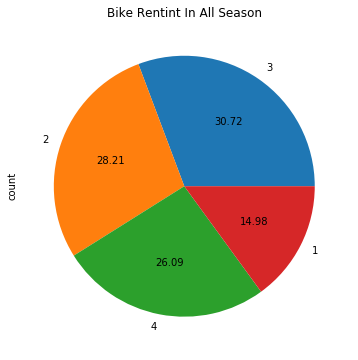

In [50]:
df.groupby('season')['count'].sum().sort_values(ascending=False).plot.pie(autopct = '%.2f', figsize= (6,6),title="Bike Renting In All Season")

## People Most Likely Rent Bike In 3rd Season And Least In 1st Season 

In [51]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [53]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'weekday',
       'month', 'duration_min'],
      dtype='object')

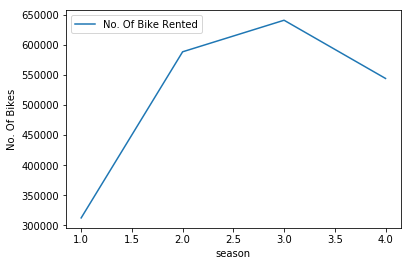

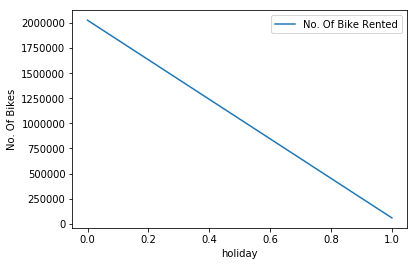

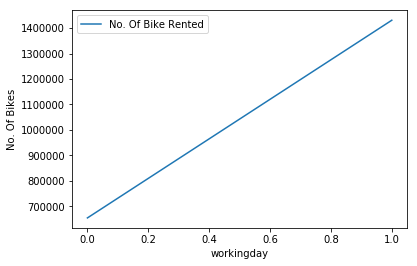

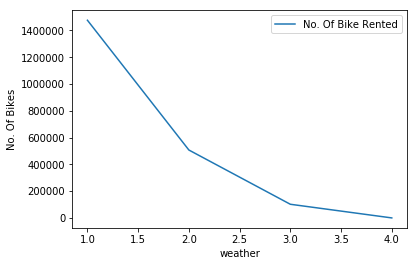

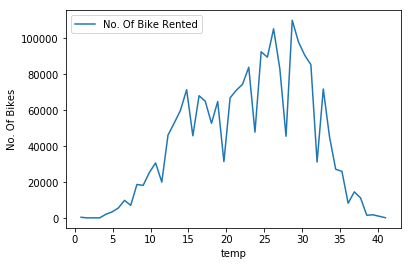

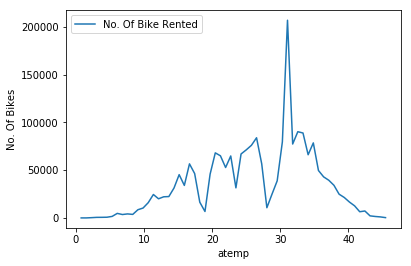

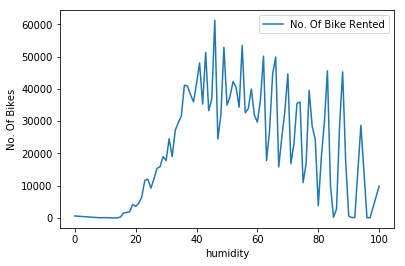

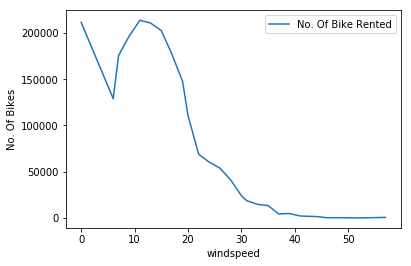

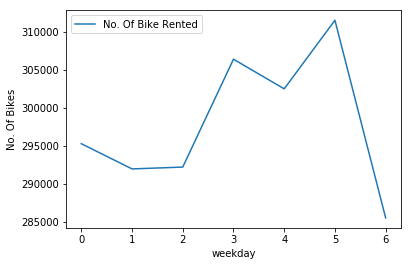

In [62]:

ploter = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed','weekday']
for i in ploter:
    plt.plot(df.groupby(i)['count'].sum(),label='No. Of Bike Rented')

                
    plt.xlabel(i)
    plt.ylabel('No. Of Bikes')
    plt.legend()

    plt.show()


## It Is Clear From Graph That No. Of Bikes Rented Most In A Non-Holiday Specially On Thrusday

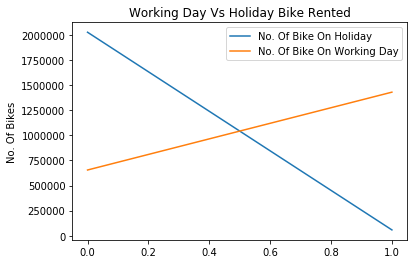

In [65]:

ploter = ['holiday', 'workingday']

plt.plot(df.groupby('holiday')['count'].sum(),label='No. Of Bike On Holiday')
plt.plot(df.groupby('workingday')['count'].sum(),label='No. Of Bike On Working Day')

plt.title('Working Day Vs Holiday Bike Rented')     

plt.ylabel('No. Of Bikes')
plt.legend()

plt.show()


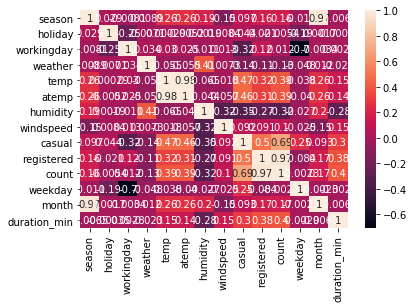

In [66]:
sns.heatmap(df.corr(),annot=True)

KeyError: ':'